In [147]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose                                  


import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('covid-data.csv')

COVID-19 - это вызывающий заболевание штамм коронавируса, появившийся в декабре 2019 года и приведший к продолжающейся глобальной пандемии. Возможность предвидеть путь пандемии имеет решающее значение. Это важно для того, чтобы определить, как бороться, и отследить его распространение.

In [148]:
df.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
140741,ZWE,Africa,Zimbabwe,2021-12-10,155817.0,0.0,2625.143,4723.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
140742,ZWE,Africa,Zimbabwe,2021-12-11,165002.0,9185.0,3782.714,4735.0,12.0,3.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
140743,ZWE,Africa,Zimbabwe,2021-12-12,167140.0,2138.0,4013.429,4738.0,3.0,4.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
140744,ZWE,Africa,Zimbabwe,2021-12-13,167140.0,0.0,4013.429,4738.0,0.0,4.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
140745,ZWE,Africa,Zimbabwe,2021-12-14,172012.0,4872.0,4344.429,4740.0,2.0,3.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [149]:
df.info() #смотрим сводку данных (изучаем)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140746 entries, 0 to 140745
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    140746 non-null  object 
 1   continent                                   131843 non-null  object 
 2   location                                    140746 non-null  object 
 3   date                                        140746 non-null  object 
 4   total_cases                                 133531 non-null  float64
 5   new_cases                                   133526 non-null  float64
 6   new_cases_smoothed                          132476 non-null  float64
 7   total_deaths                                121203 non-null  float64
 8   new_deaths                                  121399 non-null  float64
 9   new_deaths_smoothed                         132476 non-null  float64
 

In [150]:
df.sample(5) #смотрим случайные 5 строк для понимания общей таблицы.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
27489,COM,Africa,Comoros,2021-03-22,3666.0,0.0,2.857,146.0,0.0,0.000,...,4.4,23.6,15.574,2.200,64.32,0.554,NaN,NaN,NaN,NaN
23312,CPV,Africa,Cape Verde,2021-05-07,25837.0,311.0,279.286,231.0,1.0,2.000,...,2.1,16.5,NaN,2.100,72.98,0.665,NaN,NaN,NaN,NaN
71595,LSO,Africa,Lesotho,2020-12-05,2150.0,0.0,5.857,44.0,0.0,0.000,...,0.4,53.9,2.117,NaN,54.33,0.527,NaN,NaN,NaN,NaN
73663,LIE,Europe,Liechtenstein,2021-04-12,2842.0,7.0,9.000,56.0,0.0,0.000,...,NaN,NaN,NaN,2.397,82.49,0.919,NaN,NaN,NaN,NaN
100605,PER,South America,Peru,2020-07-19,353590.0,4090.0,3894.857,49429.0,784.0,700.143,...,4.8,NaN,NaN,1.600,76.74,0.777,57474.5,84.79,184.16,1722.886927


In [151]:
df.shape #выясняем кол-во строк и столбцов.

(140746, 67)

In [152]:
df.columns #выясняем названия всех столбцов.

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [153]:
uniqs = df.location.unique() #выводим уникальные значения по локации, чтобы выбрать страну для анализа.
uniqs

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [154]:
df1 = df[['location', 'date', 'new_cases', 'total_cases','new_deaths','total_deaths', 'new_vaccinations', 'total_vaccinations']] # оставляем только нужную страну и кол-во случаев заболевания для дальнейшего анализа.
df1=df1[(df1['date'] > '2021-06-30') & (df1['date'] < '2021-12-01')] # берем период с 1.07 до ноября
df1=df1[df1['location'] == 'Norway']
df1


,location,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations
95535,Norway,2021-07-01,193.0,131509.0,0.0,794.0,110931.0,4359132.0
95536,Norway,2021-07-02,240.0,131749.0,0.0,794.0,54646.0,4413778.0
95537,Norway,2021-07-03,112.0,131861.0,0.0,794.0,9897.0,4423675.0
95538,Norway,2021-07-04,88.0,131949.0,0.0,794.0,6590.0,4430265.0
95539,Norway,2021-07-05,187.0,132136.0,0.0,794.0,27576.0,4457841.0
...,...,...,...,...,...,...,...,...
95683,Norway,2021-11-26,2942.0,257309.0,0.0,1050.0,28932.0,8610574.0
95684,Norway,2021-11-27,1891.0,259200.0,0.0,1050.0,3694.0,8614268.0
95685,Norway,2021-11-28,1721.0,260921.0,0.0,1050.0,938.0,8615206.0
95686,Norway,2021-11-29,2877.0,263798.0,0.0,1050.0,27369.0,8642575.0


<AxesSubplot:>

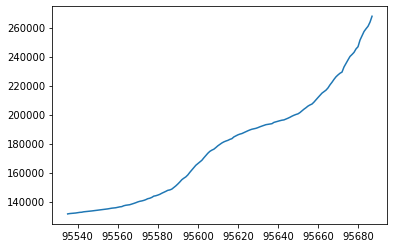

In [155]:
df1.total_cases.plot() #для анализа выбрана Норвегия. Смотрим динамику за все время.

In [156]:
df1.dtypes #проверяем правильно ли интерпретированы данные

location               object
date                   object
new_cases             float64
total_cases           float64
new_deaths            float64
total_deaths          float64
new_vaccinations      float64
total_vaccinations    float64
dtype: object

# Обработка пропусков

In [157]:
df1.isnull().sum()

location              0
date                  0
new_cases             0
total_cases           0
new_deaths            0
total_deaths          0
new_vaccinations      0
total_vaccinations    0
dtype: int64

Пропусков нет

# EDA или разведочный анализ данных.

Исходя из результатов, полученных на предыдущем этапе, определяем ключевым столбцом (index) дату стат. показателей в Df, т.к. далее будем работать с временными рядами, в т.ч. меняем тип данных (time) в указанном столбце на подходящий нам для дальнейшей работы

In [158]:
df1['date']=df1['date'].astype('datetime64')
df1.index=df1.date
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2021-07-01 to 2021-11-30
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            153 non-null    object        
 1   date                153 non-null    datetime64[ns]
 2   new_cases           153 non-null    float64       
 3   total_cases         153 non-null    float64       
 4   new_deaths          153 non-null    float64       
 5   total_deaths        153 non-null    float64       
 6   new_vaccinations    153 non-null    float64       
 7   total_vaccinations  153 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 10.8+ KB


,location,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations
date,,,,,,,,
2021-07-01,Norway,2021-07-01,193.0,131509.0,0.0,794.0,110931.0,4359132.0
2021-07-02,Norway,2021-07-02,240.0,131749.0,0.0,794.0,54646.0,4413778.0
2021-07-03,Norway,2021-07-03,112.0,131861.0,0.0,794.0,9897.0,4423675.0
2021-07-04,Norway,2021-07-04,88.0,131949.0,0.0,794.0,6590.0,4430265.0
2021-07-05,Norway,2021-07-05,187.0,132136.0,0.0,794.0,27576.0,4457841.0
...,...,...,...,...,...,...,...,...
2021-11-26,Norway,2021-11-26,2942.0,257309.0,0.0,1050.0,28932.0,8610574.0
2021-11-27,Norway,2021-11-27,1891.0,259200.0,0.0,1050.0,3694.0,8614268.0
2021-11-28,Norway,2021-11-28,1721.0,260921.0,0.0,1050.0,938.0,8615206.0


In [159]:
df1.describe()

,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations
count,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02
mean,892.333333,177630.352941,1.699346,859.183007,28983.045752,6.966367e+06
std,783.864583,37126.455526,5.872645,69.060846,32261.844313,1.314795e+06
min,88.000000,131509.000000,-1.000000,794.000000,14.000000,4.359132e+06
25%,322.000000,140836.000000,0.000000,804.000000,4178.000000,5.702725e+06
50%,641.000000,179450.000000,0.000000,841.000000,16032.000000,7.568199e+06
75%,1219.000000,200093.000000,1.000000,894.000000,41184.000000,8.013170e+06
max,4575.000000,267843.000000,46.000000,1054.000000,138716.000000,8.682607e+06


<AxesSubplot:>

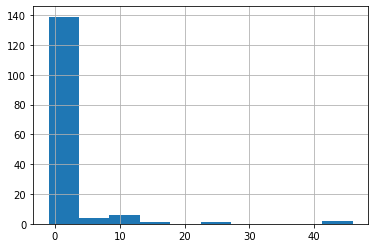

In [160]:
df1['new_deaths'].hist()

<AxesSubplot:>

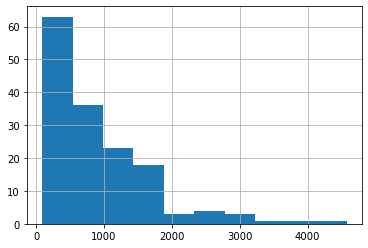

In [161]:
df1['new_cases'].hist()

<AxesSubplot:>

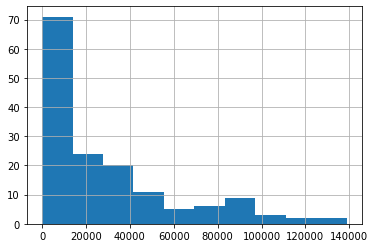

In [162]:
df1['new_vaccinations'].hist()

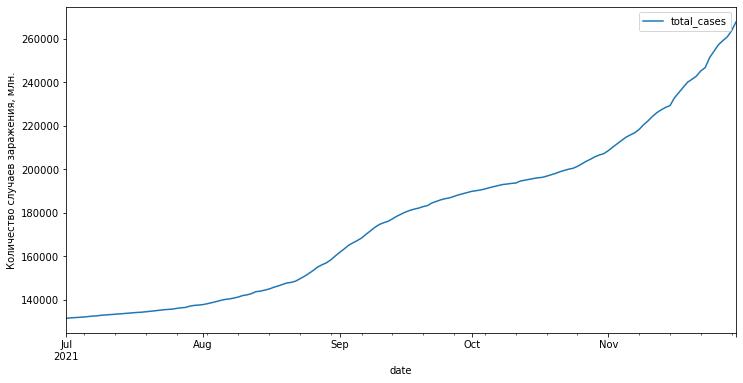

In [163]:
ax=df1['total_cases'].plot(figsize=(12,6) , legend=True)
ax.set_ylabel("Количество случаев заражения, млн.") 
title = 'Месячные уровни CO₂ '

Text(0, 0.5, 'Количество летальных случаев')

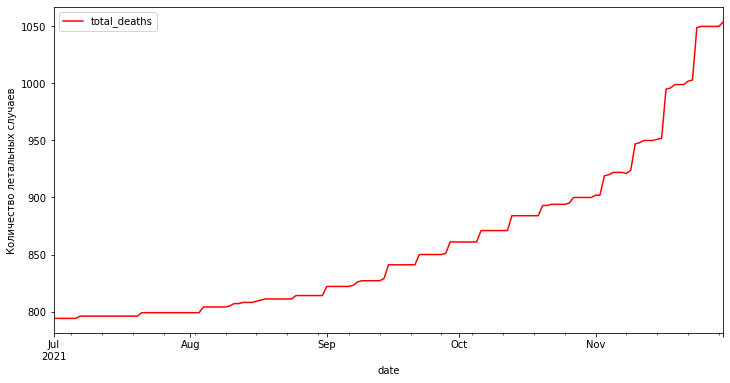

In [164]:
ax1=df1['total_deaths'].plot(figsize=(12,6) , legend=True, color='red')
ax1.set_ylabel("Количество летальных случаев") 

Text(0, 0.5, 'Количество вакцинированных человек, млн./100')

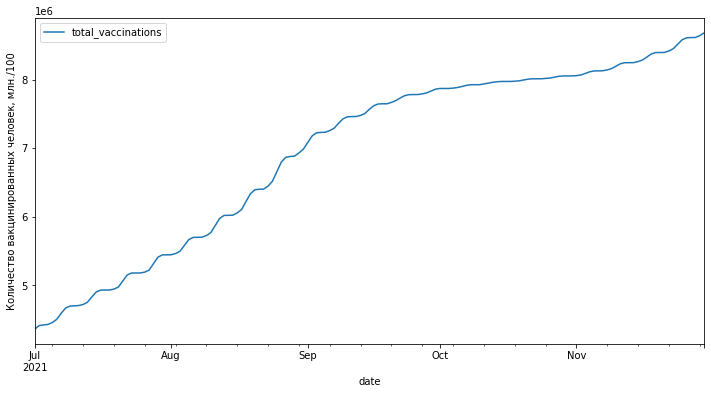

In [166]:
ax2=df1['total_vaccinations'].plot(figsize=(12,6) , legend=True)
ax2.set_ylabel("Количество вакцинированных человек, млн./100") 

Text(0, 0.5, 'Количество случаев заражения')

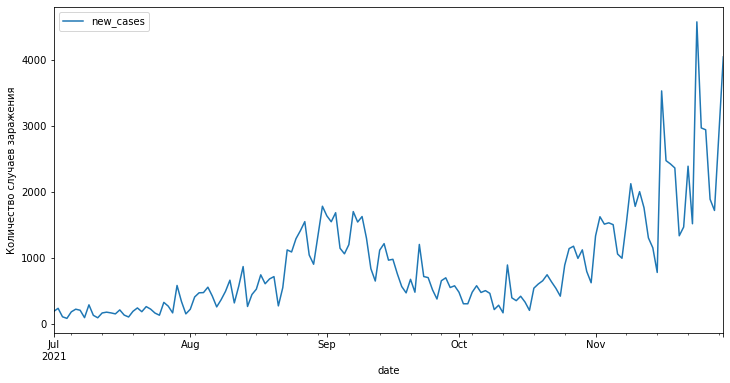

In [167]:
ax3=df1['new_cases'].plot(figsize=(12,6) , legend=True)
ax3.set_ylabel("Количество случаев заражения") 

Text(0, 0.5, 'Количество летальных случаев')

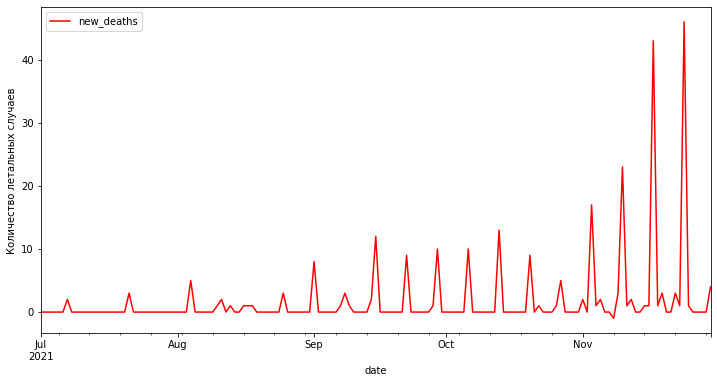

In [169]:
ax4=df1['new_deaths'].plot(figsize=(12,6) , legend=True, color='red')
ax4.set_ylabel("Количество летальных случаев") 

Text(0, 0.5, 'Количество вакцинированных')

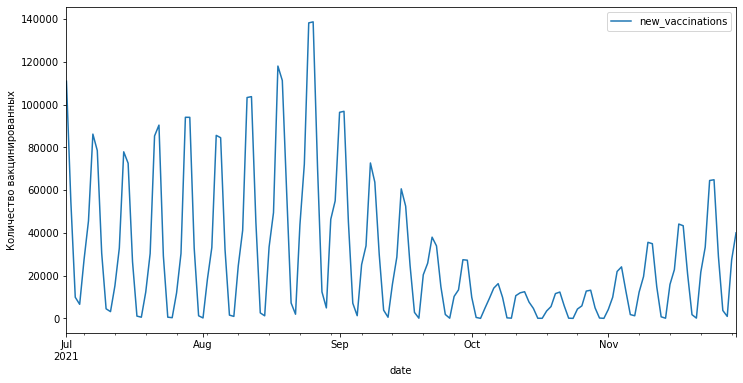

In [171]:
ax5=df1['new_vaccinations'].plot(figsize=(12,6) , legend=True)
ax5.set_ylabel("Количество вакцинированных") 

<AxesSubplot:xlabel='new_vaccinations', ylabel='new_deaths'>

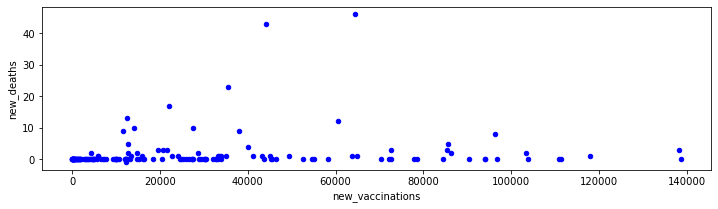

In [172]:
df1.plot.scatter(x='new_vaccinations', y='new_deaths', alpha=1, figsize=(12,3), lw=1,color='b' )

<AxesSubplot:xlabel='new_vaccinations', ylabel='new_cases'>

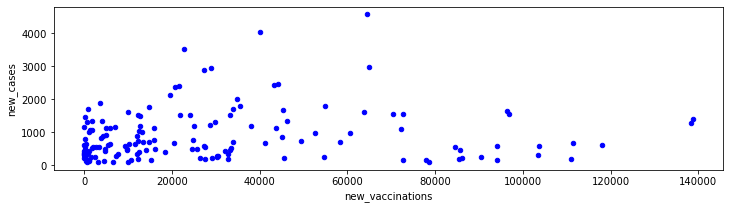

In [173]:
df1.plot.scatter(x='new_vaccinations', y='new_cases', alpha=1, figsize=(12,3), lw=1,color='b' )

<AxesSubplot:xlabel='new_cases', ylabel='new_deaths'>

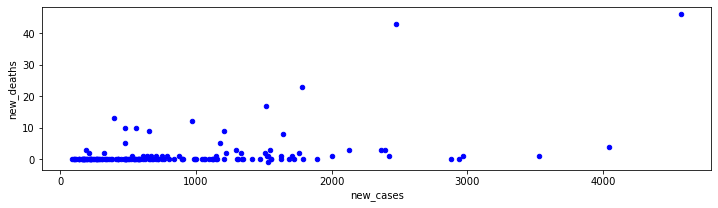

In [175]:
df1.plot.scatter(x='new_cases', y='new_deaths', alpha=1, figsize=(12,3), lw=1,color='b' )